In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Training Data
Create a sample of p = 120 training patterns {x(α), y(α)}, α = 1, . . . , p. The input values T
x(α) ∈ R2 should be drawn from a mixture of Gaussians with centers in an XOR-configuration according to the following scheme:

Generate 60 samples from each of the following conditional distributions:
p(x|y=0) := 0.5*[N(x|μ1,Iσ^2)+N(x|μ2,Iσ^2)],
p(x|y=1) := 0.5*[N(x|μ3 ,Iσ^2)+N(x|μ4 ,Iσ^2)],
with μ1 = (0,1)⊤,μ2 = (1,0)⊤,μ3 = (0,0)⊤,μ4 = (1,1)⊤ and a variance of σ2 =0.1.

• To sample from one of the two mixture variables you can
(i) draw with probability 1/2 whether you will draw the next point from the density in the left summand or from the density in the right summand, then
(ii) sample from that normal distribution yielding a single point x(α).
Note that N (x|μ, I σ2) is the probability density of a multivariate normal distribution of a vector x, where μ is the mean vector and σ2 the variance. The variance is the same for all components.

• The corresponding target values y(α) ∈ {0, 1} describe the assignment to the two classes T
and indicate from which distribution [ p(x|y = 0) vs. p(x|y = 1) ] the data point was drawn.

(60, 2)
(60, 2)
(120, 2)
(120,)


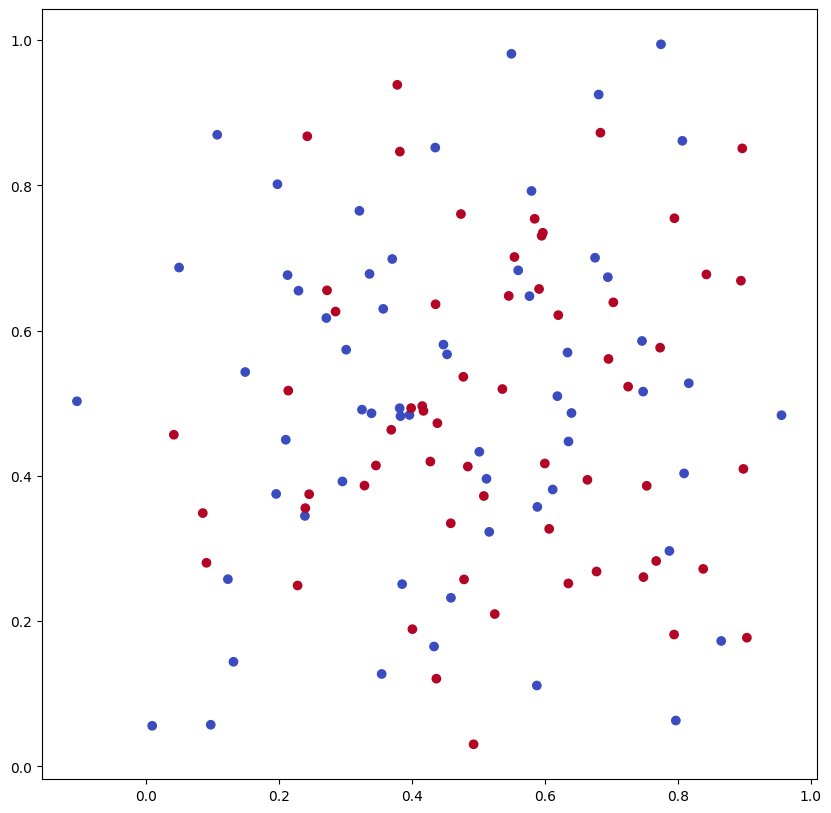

In [31]:
# Define the means and variance
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])
mu3 = np.array([0, 0])
mu4 = np.array([1, 1])
variance = 0.1

# Generate 60 samples from the mixture distribution for x_0
x_0_1 = np.random.multivariate_normal(mu1, variance*np.identity(2), size=60)
x_0_2 = np.random.multivariate_normal(mu2, variance*np.identity(2), size=60)
p_x0 = 0.5 * (x_0_1 + x_0_2)

# Generate 60 samples from the mixture distribution for x_1
x_1_1 = np.random.multivariate_normal(mu3, variance*np.identity(2), size=60)
x_1_2 = np.random.multivariate_normal(mu4, variance*np.identity(2), size=60)
p_x1 = 0.5 * (x_1_1 + x_1_2)


# Verify the shape of x_0
print(p_x0.shape)  # should be (60, 2)

# Verify the shape of x_1
print(p_x1.shape)  # should be (60, 2)

#Assign labels to the data
y_0 = np.zeros(60)
y_1 = np.ones(60)

# Concatenate the data and labels
X = np.concatenate((p_x0, p_x1), axis=0)
yT = np.concatenate((y_0, y_1), axis=0)

# Verify the shape of x
print(X.shape)  # should be (120, 2)

# Verify the shape of y
print(yT.shape)  # should be (120,)

# Plot the data

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=yT, cmap='coolwarm')
plt.show()



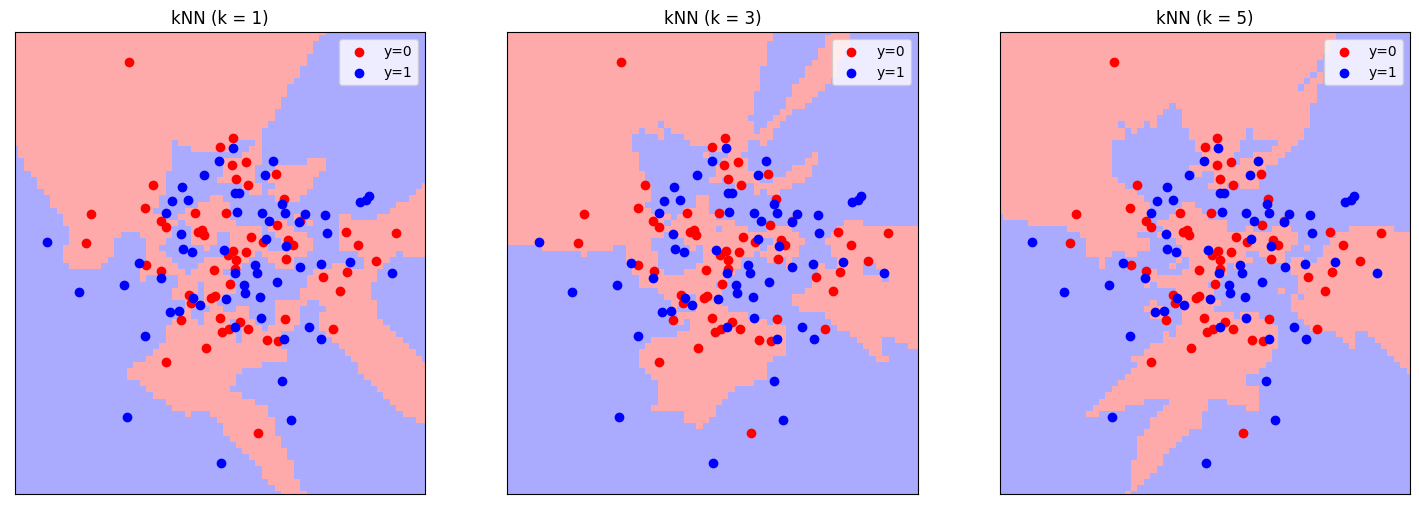

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Generate the training patterns
mu1 = np.array([0, 1])
mu2 = np.array([1, 0])
mu3 = np.array([0, 0])
mu4 = np.array([1, 1])
variance = 0.1

x_0_1 = np.random.multivariate_normal(mu1, variance*np.identity(2), size=60)
x_0_2 = np.random.multivariate_normal(mu2, variance*np.identity(2), size=60)
x_0 = 0.5 * (x_0_1 + x_0_2)
y_0 = np.zeros(60)

x_1_1 = np.random.multivariate_normal(mu3, variance*np.identity(2), size=60)
x_1_2 = np.random.multivariate_normal(mu4, variance*np.identity(2), size=60)
x_1 = 0.5 * (x_1_1 + x_1_2)
y_1 = np.ones(60)

x = np.vstack([x_0, x_1])
y = np.hstack([y_0, y_1])

# Fit the kNN classifier with k=1, k=3, and k=5
ks = [1, 3, 5]
classifiers = {}
for k in ks:
    classifiers[k] = KNeighborsClassifier(n_neighbors=k)
    classifiers[k].fit(x, y)

# Plot the training patterns and decision boundary
h = 0.02
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(18, 6))
i = 1
for k in ks:
    Z = classifiers[k].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.subplot(1, 3, i)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='y=0')
    plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='y=1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('kNN (k = {})'.format(k))
    plt.legend()
    i += 1

plt.show()
